**Imports**

In [3]:
%load_ext autoreload
%autoreload 2
from data_preprocessing import preprocess_data
from feature_extraction import get_feature_extractor
from model_training import train_model
from model_evaluation import evaluate_single_model, compare_models
from config import MODELS
import warnings
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

**Preprocess Info**

Class mapping:
  0 = Glioma
  1 = Meningioma
  2 = None
  3 = Pituitary

Visualizing model-specific preprocessing on sample image (Glioma image[2]):


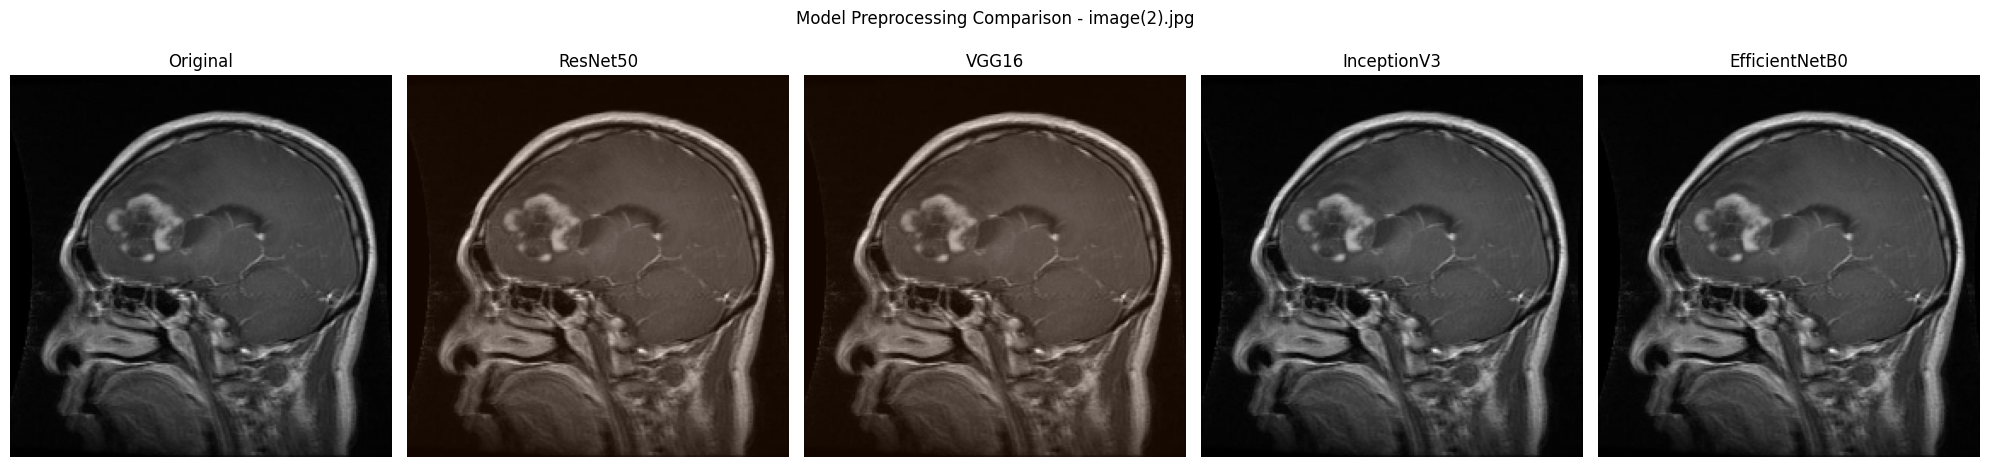

Mean pixel values after preprocessing:
  Original: mean = 46.95, std = 41.78
  ResNet50: mean = -67.85, std = 42.57
  VGG16: mean = -67.85, std = 42.57
  InceptionV3: mean = -0.63, std = 0.33
  EfficientNetB0: mean = 46.95, std = 41.78

Original class distribution:
  Class 0: 926 images
  Class 1: 937 images
  Class 2: 500 images
  Class 3: 901 images

Augmenting class 0 with 11 synthetic samples...


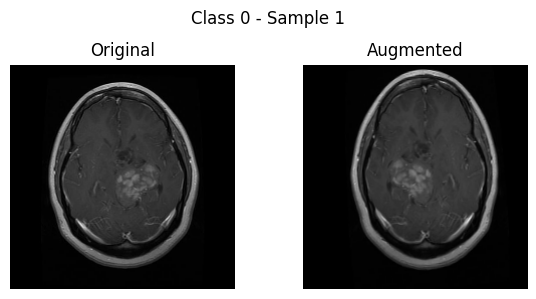

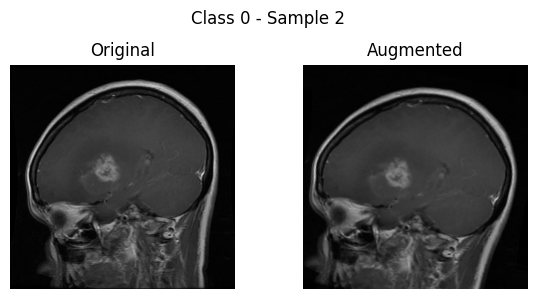

Augmenting class 2 with 437 synthetic samples...


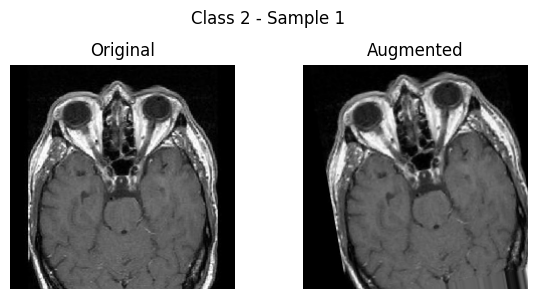

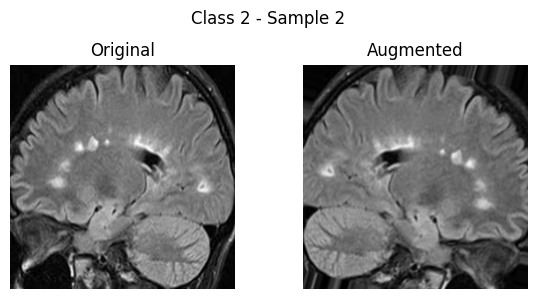

Augmenting class 3 with 36 synthetic samples...


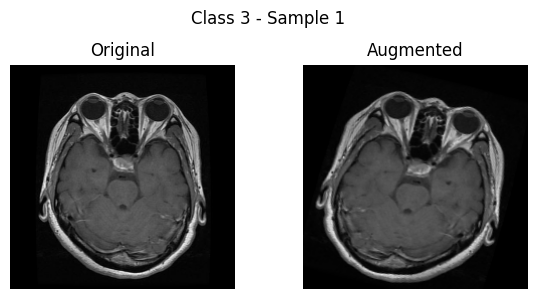

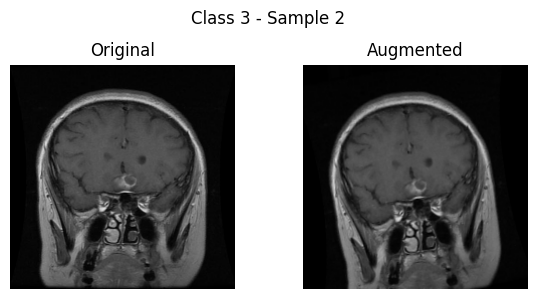

Augmented balanced class distribution:
  Class 0: 937 images
  Class 1: 937 images
  Class 2: 937 images
  Class 3: 937 images

Final balanced dataset shape:
  Images: (3748, 224, 224, 3)
  Labels: (3748,)

Train dataset distribution: [656, 656, 655, 656]
Test dataset distribution: [281, 281, 282, 281]


In [4]:
model_name = MODELS[0]  
X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=True)
trained_models = {}
validation_accuracies_per_model = {}

**ResNet50 Training**


Training Fold 1...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 842ms/step - accuracy: 0.5594 - loss: 14.0336 - val_accuracy: 0.8338 - val_loss: 1.6258 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 831ms/step - accuracy: 0.9019 - loss: 0.7182 - val_accuracy: 0.8628 - val_loss: 1.3579 - learning_rate: 0.0010

Training Fold 2...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 854ms/step - accuracy: 0.8461 - loss: 1.4978 - val_accuracy: 0.9497 - val_loss: 0.2773 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 835ms/step - accuracy: 0.9432 - loss: 0.2688 - val_accuracy: 0.9626 - val_loss: 0.1613 - learning_rate: 0.0010

Best model across folds saved to: models\ResNet50.keras


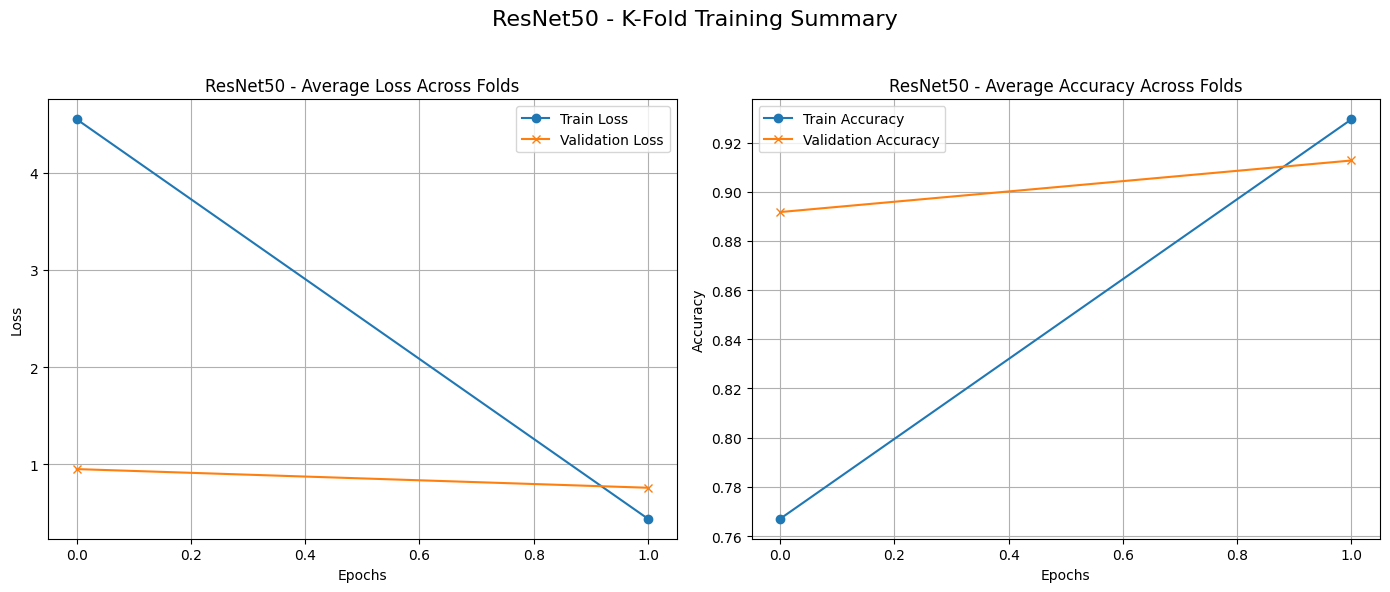

ResNet50 training complete!


In [5]:
model = get_feature_extractor(model_name)

model, fold_accuracies = train_model(model, model_name, X_train, y_train)

validation_accuracies_per_model[model_name] = fold_accuracies 
trained_models[model_name] = {
    "model": model,
    "X_test": X_test,
    "y_test": y_test,
    "class_names": class_names
}
print(f"{model_name} training complete!")

**VGG16 Training**


Training Fold 1...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.6060 - loss: 9.5542 - val_accuracy: 0.7561 - val_loss: 3.4226 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8979 - loss: 0.8393 - val_accuracy: 0.8453 - val_loss: 1.5054 - learning_rate: 0.0010

Training Fold 2...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.8425 - loss: 1.5052 - val_accuracy: 0.9588 - val_loss: 0.1811 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9458 - loss: 0.2454 - val_accuracy: 0.9657 - val_loss: 0.1678 - learning_rate: 0.0010

Best model across folds saved to: models\VGG16.keras


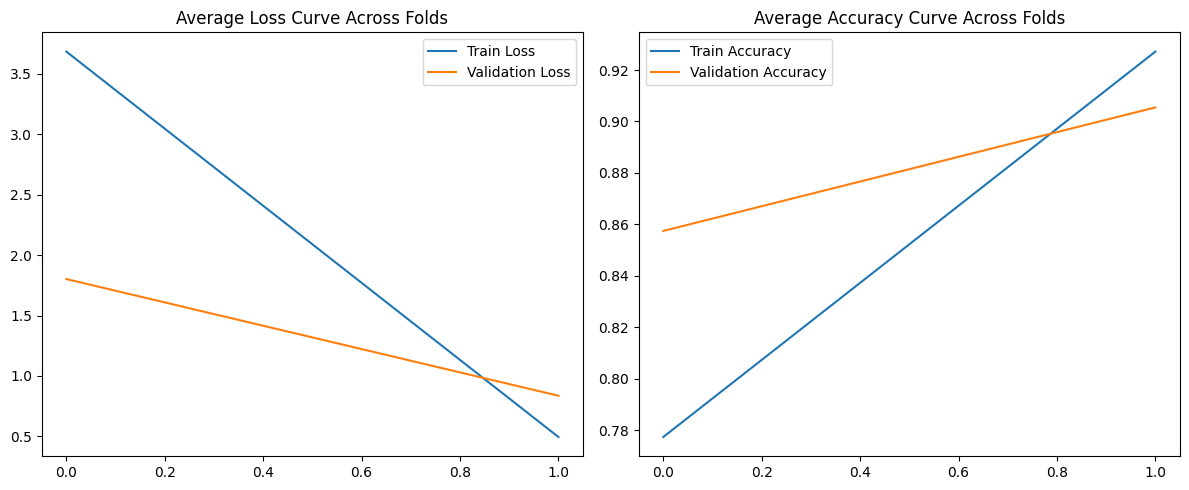

VGG16 training complete!


In [16]:
model_name = MODELS[1]  

X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=False)

model = get_feature_extractor(model_name)
model, fold_accuracies = train_model(model, model_name, X_train, y_train)

validation_accuracies_per_model[model_name] = fold_accuracies 
trained_models[model_name] = {
    "model": model,
    "X_test": X_test,
    "y_test": y_test,
    "class_names": class_names
}

print(f"{model_name} training complete!")

**EfficientNetB0 Training**


Training Fold 1...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 403ms/step - accuracy: 0.5545 - loss: 4.9766 - val_accuracy: 0.7767 - val_loss: 1.2968 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 363ms/step - accuracy: 0.8906 - loss: 0.4289 - val_accuracy: 0.8529 - val_loss: 0.5435 - learning_rate: 0.0010

Training Fold 2...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 408ms/step - accuracy: 0.8545 - loss: 0.5091 - val_accuracy: 0.9451 - val_loss: 0.1515 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 376ms/step - accuracy: 0.9176 - loss: 0.2111 - val_accuracy: 0.9504 - val_loss: 0.1471 - learning_rate: 0.0010

Best model across folds saved to: models\EfficientNetB0.keras


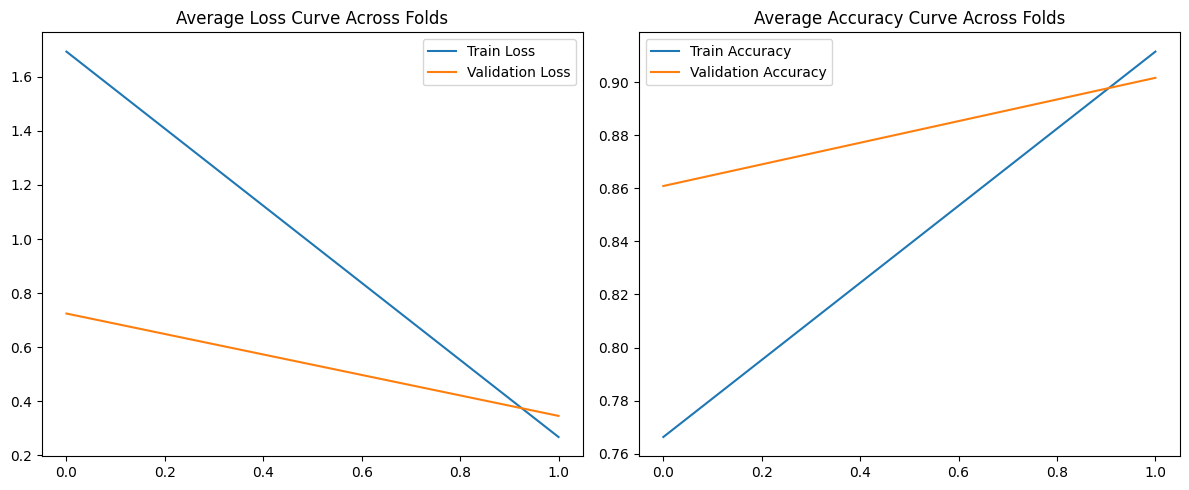

EfficientNetB0 training complete!


In [17]:
model_name = MODELS[2]  

X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=False)

model = get_feature_extractor(model_name)
model, fold_accuracies = train_model(model, model_name, X_train, y_train)

validation_accuracies_per_model[model_name] = fold_accuracies 
trained_models[model_name] = {
    "model": model,
    "X_test": X_test,
    "y_test": y_test,
    "class_names": class_names
}
print(f"{model_name} training complete!")

**InceptionV3 Training**


Training Fold 1...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 24s 506ms/step - accuracy: 0.4598 - loss: 16.9246 - val_accuracy: 0.7980 - val_loss: 0.9413 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 480ms/step - accuracy: 0.8925 - loss: 0.3102 - val_accuracy: 0.8476 - val_loss: 0.5428 - learning_rate: 0.0010

Training Fold 2...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 498ms/step - accuracy: 0.8468 - loss: 0.5650 - val_accuracy: 0.9252 - val_loss: 0.2105 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 452ms/step - accuracy: 0.9145 - loss: 0.2132 - val_accuracy: 0.9306 - val_loss: 0.1742 - learning_rate: 0.0010

Best model across folds saved to: models\InceptionV3.keras


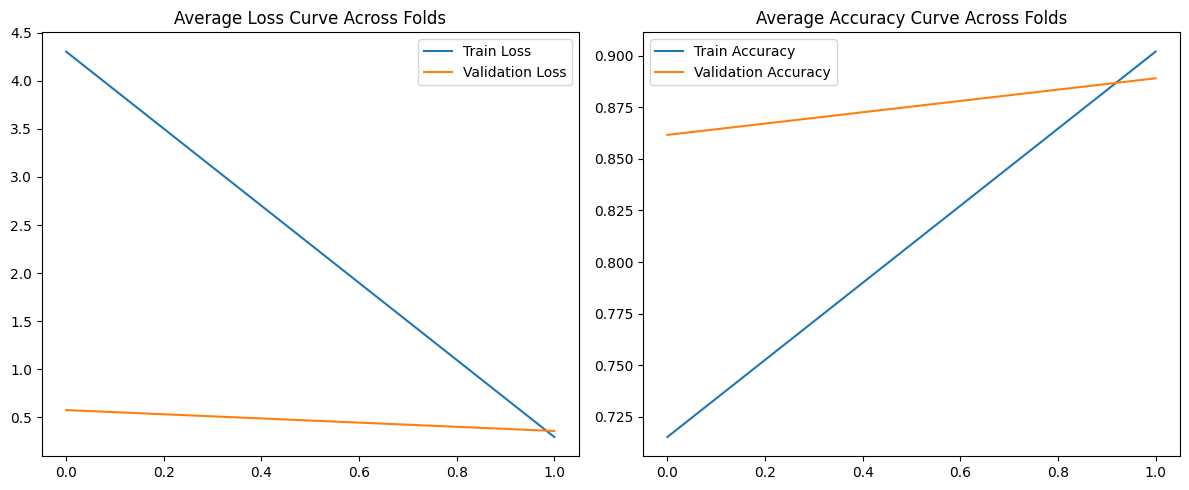

InceptionV3 training complete!


In [18]:
model_name = MODELS[3]  

X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=False)

model = get_feature_extractor(model_name)
model, fold_accuracies = train_model(model, model_name, X_train, y_train)

validation_accuracies_per_model[model_name] = fold_accuracies
trained_models[model_name] = {
    "model": model,
    "X_test": X_test,
    "y_test": y_test,
    "class_names": class_names
}
print(f"{model_name} training complete!")

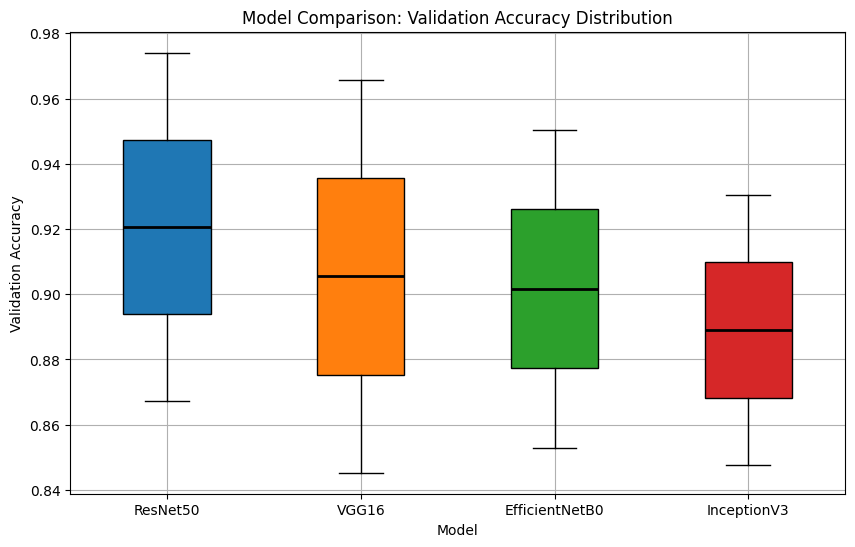

In [19]:
# Final comparison boxplot
plt.figure(figsize=(10, 6))

model_names = list(validation_accuracies_per_model.keys())
data = [validation_accuracies_per_model[name] for name in model_names]

box = plt.boxplot(data, patch_artist=True, tick_labels=model_names)

# Use a colormap (tab10 has 10 distinct colors)
cmap = cm.get_cmap('tab10')

# Apply box colors
for i, patch in enumerate(box['boxes']):
    color = cmap(i % cmap.N)
    patch.set_facecolor(color)

# Set all median lines to black
for median in box['medians']:
    median.set_color('black')
    median.set_linewidth(2)

plt.title("Model Comparison: Validation Accuracy Distribution")
plt.ylabel("Validation Accuracy")
plt.xlabel("Model")
plt.grid(True)
plt.show()

**ResNet50 Evaluation**


Evaluating model: ResNet50
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 418ms/step
Classification Report:
              precision    recall  f1-score   support

      Glioma       0.86      0.84      0.85       281
  Meningioma       0.82      0.77      0.80       281
        None       0.94      0.94      0.94       282
   Pituitary       0.91      0.99      0.95       281

    accuracy                           0.89      1125
   macro avg       0.88      0.89      0.88      1125
weighted avg       0.88      0.89      0.88      1125

Accuracy: 0.89


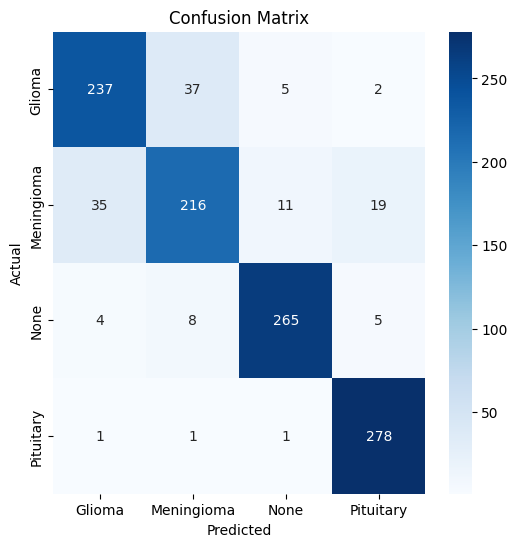

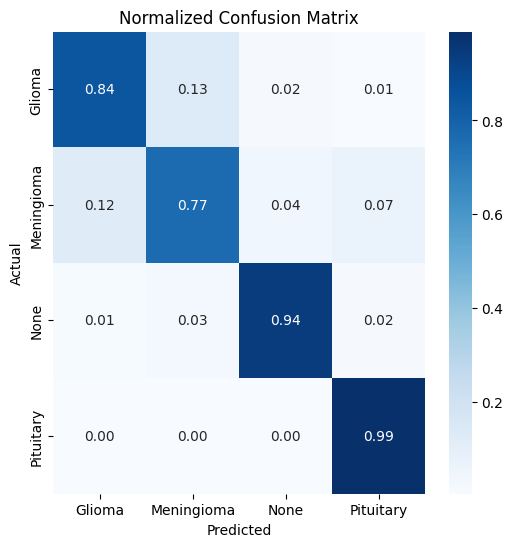

Multiclass ROC AUC Score: 0.98


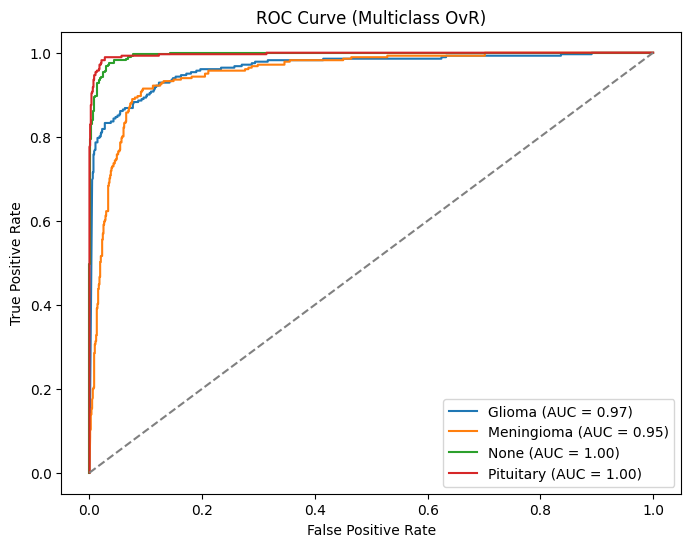

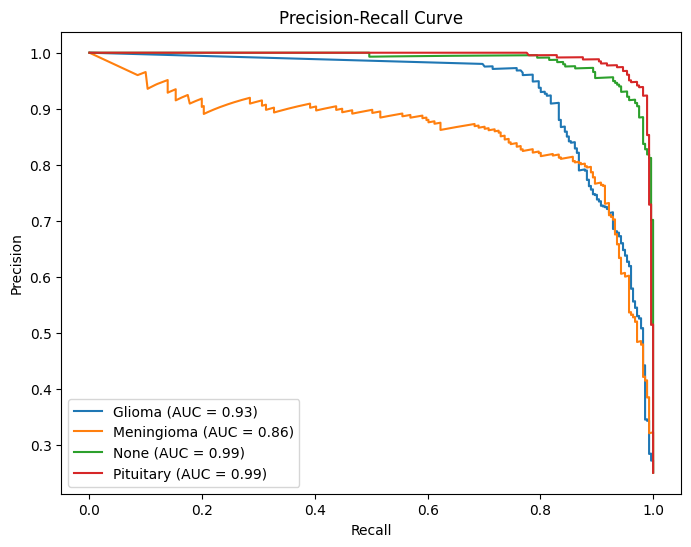

In [6]:
model_name = MODELS[0] 

if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")
    evaluate_single_model(
        trained_models[model_name]["model"],
        trained_models[model_name]["X_test"],
        trained_models[model_name]["y_test"],
        trained_models[model_name]["class_names"]
    )
else:
    print(f"Model {model_name} not found in trained_models.")

**VGG16 Evaluation**

In [ ]:
model_name = MODELS[1] 

if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")
    evaluate_single_model(
        trained_models[model_name]["model"],
        trained_models[model_name]["X_test"],
        trained_models[model_name]["y_test"],
        trained_models[model_name]["class_names"]
    )
else:
    print(f"Model {model_name} not found in trained_models.")

**EfficientNetB0 Evaluation**

In [ ]:
model_name = MODELS[2] 

if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")
    evaluate_single_model(
        trained_models[model_name]["model"],
        trained_models[model_name]["X_test"],
        trained_models[model_name]["y_test"],
        trained_models[model_name]["class_names"]
    )
else:
    print(f"Model {model_name} not found in trained_models.")

Model EfficientNetB0 not found in trained_models.


**InceptionV3 Evaluation**

In [ ]:
model_name = MODELS[3] 

if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")
    evaluate_single_model(
        trained_models[model_name]["model"],
        trained_models[model_name]["X_test"],
        trained_models[model_name]["y_test"],
        trained_models[model_name]["class_names"]
    )
else:
    print(f"Model {model_name} not found in trained_models.")

**Model Comparison**

In [8]:
compare_models(trained_models)

Evaluating Models...

36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 391ms/step


ResNet50                
         Precision Recall F1-score
CLASS                             
0             0.86   0.84     0.85
1             0.82   0.77     0.80
2             0.94   0.94     0.94
3             0.91   0.99     0.95
Average       0.88   0.89     0.88
Accuracy      0.89    NaN      NaN